## Binary Classification Task 1: Anagrams (focused/divided)

### Step 1: Import Libraries and Load Data

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split



In [38]:
df = pd.read_csv(r"A:\Code\PY\DSc\datasets\04-binary-classification\anagrams.csv")
df.drop(columns=["subidr"], inplace=True)
df

,attnr,num1,num2,num3
0,divided,2,4.0,7
1,divided,3,4.0,5
2,divided,3,5.0,6
3,divided,5,7.0,5
4,divided,4,5.0,8
5,divided,5,5.0,6
6,divided,5,4.5,6
7,divided,5,7.0,8
8,divided,2,3.0,7
9,divided,6,5.0,6


### Step 2: EDA + Preprocessing + train test split

In [39]:
df.shape

(20, 4)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   attnr   20 non-null     object 
 1   num1    20 non-null     int64  
 2   num2    20 non-null     float64
 3   num3    20 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 772.0+ bytes


In [41]:
df.describe()

,num1,num2,num3
count,20.000000,20.00000,20.000000
mean,5.350000,5.97500,6.550000
std,1.843195,1.67391,1.099043
min,2.000000,3.00000,5.000000
25%,4.750000,5.00000,6.000000
50%,5.500000,5.50000,6.000000
75%,6.250000,7.25000,7.000000
max,8.000000,9.00000,9.000000


<Axes: title={'center': 'num3'}, ylabel='Density'>

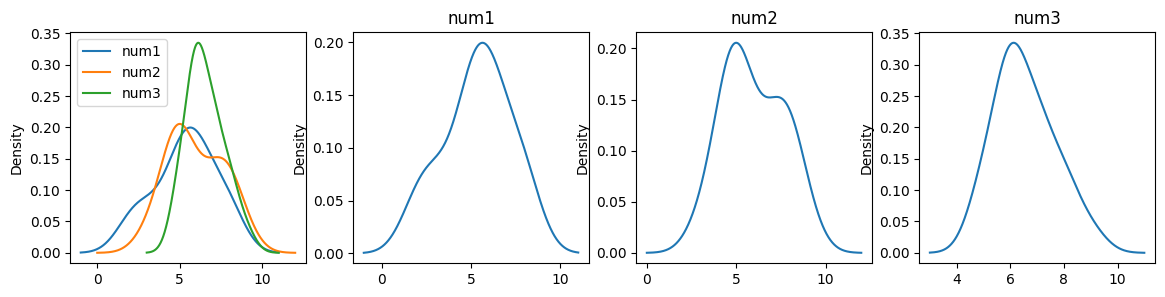

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(14,3))



df["num1"].plot(kind='kde', ax=ax1, label="num1")
df["num2"].plot(kind="kde", ax=ax1, label="num2")
df["num3"].plot(kind='kde', ax=ax1, label="num3")

ax1.legend()  


df["num1"].plot(kind='kde', ax=ax2, title="num1")
df["num2"].plot(kind="kde", ax=ax3, title="num2")
df["num3"].plot(kind='kde', ax=ax4, title="num3")


### Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

label_column = df["attnr"]

le = LabelEncoder()
label_enc_col = le.fit_transform(label_column)
label_enc_col

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
le.classes_
#  divided: 0, focused:1

array(['divided', 'focused'], dtype=object)

### train test split

In [45]:
X = df[["num1", "num2", "num3"]]
y = label_enc_col

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Training the Model

### Step 4: Predict and Evaluate

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred=y_pred_lr))


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("DeceisionTreeClassifier Accuracy: ", accuracy_score(y_test, y_pred=y_pred_dt))



knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNeighborsClassifier Accuracy: ", accuracy_score(y_test, y_pred=y_pred_knn))


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("RandomForestClassifier Accuracy: ", accuracy_score(y_test, y_pred=y_pred_rfc))


svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vectors Machine Accuracy: ", accuracy_score(y_test, y_pred=y_pred_svm))

Logistic Regression Accuracy:  1.0
DeceisionTreeClassifier Accuracy:  1.0
KNeighborsClassifier Accuracy:  1.0
RandomForestClassifier Accuracy:  1.0
Support Vectors Machine Accuracy:  1.0


### Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

cv_score_lr = cross_val_score(LogisticRegression(), X_train, y_train, scoring="accuracy", cv=5)
print("Cross Validation Score of LogisticRegression: ", np.mean(cv_score_lr))

cv_score_dt = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
print("Cross Validation Score of DecisionTreeClassifier: ", np.mean(cv_score_dt))


cv_score_knn = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5)
print("Cross Validation Score of KNeighborsClassifier: ", np.mean(cv_score_knn))


cv_score_rfc = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)
print("Cross Validation Score of RandomForestClassifier: ", np.mean(cv_score_rfc))

cv_score_svm = cross_val_score(SVC(), X_train, y_train, cv=5)
print("Cross Validation Score of Support Vector Machines: ", np.mean(cv_score_svm))


Cross Validation Score of LogisticRegression:  0.7499999999999999
Cross Validation Score of DecisionTreeClassifier:  0.5499999999999999
Cross Validation Score of KNeighborsClassifier:  0.6833333333333333
Cross Validation Score of RandomForestClassifier:  0.6166666666666666
Cross Validation Score of Support Vector Machines:  0.6166666666666666


In [72]:
from sklearn.metrics import classification_report, confusion_matrix

print("------------------------------------------------------")
print("Classification Report for Logistic Regression:")
print("------------------------------------------------------")
print(classification_report(y_test, y_pred_lr))

print("------------------------------------------------------")

print("Confusion Matrix for Logistic Regression:")
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_lr))


------------------------------------------------------
Classification Report for Logistic Regression:
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

------------------------------------------------------
Confusion Matrix for Logistic Regression:
------------------------------------------------------
[[2 0]
 [0 2]]


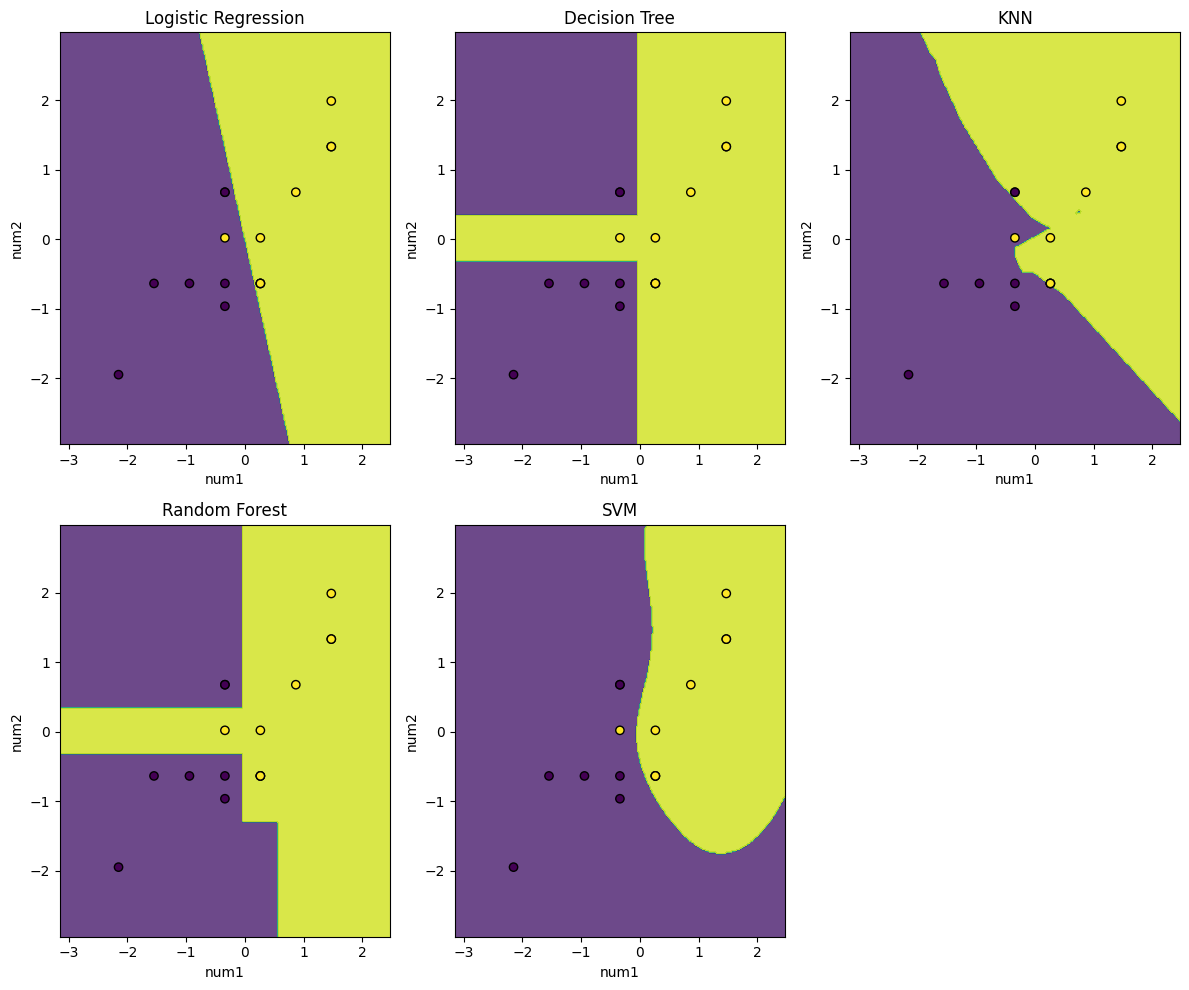

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# We will use just num1 and num2 for visualization
X_vis = df[["num1", "num2"]].values
y_vis = label_enc_col

# Split the data into train and test sets for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_vis_scaled = scaler.fit_transform(X_train_vis)
X_test_vis_scaled = scaler.transform(X_test_vis)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot decision boundaries for each model
models = [lr, dt, knn, rfc, svm]
model_names = ["Logistic Regression", "Decision Tree", "KNN", "Random Forest", "SVM"]

plt.figure(figsize=(12, 10))

for i, model in enumerate(models):
    model.fit(X_train_vis_scaled, y_train_vis)
    plt.subplot(2, 3, i + 1)
    
    # Plot the decision boundary by predicting class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train_vis_scaled[:, 0], X_train_vis_scaled[:, 1], c=y_train_vis, edgecolors='k', marker='o')
    plt.title(model_names[i])
    plt.xlabel('num1')
    plt.ylabel('num2')

plt.tight_layout()
plt.show()


In [63]:
# Get the coefficients and intercept for Logistic Regression
b0_lr = lr.intercept_  # Intercept (bias)
m1_lr, m2_lr = lr.coef_[0]  # Coefficients for num1 and num2

# Example input values (e.g., num1 = 3.5, num2 = 4.0)
num1_input = 3.5
num2_input = 4.0

# Calculate the linear decision function (similar to the equation)
y_pred_lr_manual = b0_lr + m1_lr * num1_input + m2_lr * num2_input

print("Predicted class for Logistic Regression: ", y_pred_lr_manual)

# Predict using the trained model for comparison
y_pred_lr_model = lr.predict([[num1_input, num2_input]])
print("Predicted class using model: ", y_pred_lr_model)


Predicted class for Logistic Regression:  [6.21668224]
Predicted class using model:  [1]


In [64]:
y_pred_dt_manual = dt.predict([[num1_input, num2_input]])
print("Predicted class for Decision Tree: ", y_pred_dt_manual)


Predicted class for Decision Tree:  [1]


In [65]:
y_pred_rfc_manual = rfc.predict([[num1_input, num2_input]])
print("Predicted class for Random Forest: ", y_pred_rfc_manual)


Predicted class for Random Forest:  [1]


In [66]:
y_pred_knn_manual = knn.predict([[num1_input, num2_input]])
print("Predicted class for KNN: ", y_pred_knn_manual)


Predicted class for KNN:  [1]


In [67]:
y_pred_svm_manual = svm.predict([[num1_input, num2_input]])
print("Predicted class for SVM: ", y_pred_svm_manual)


Predicted class for SVM:  [0]
